In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

271 186


/var/folders/47/8qsbvq8570n6fyh1nw5w71tc0000gp/T/ipykernel_88756/502292982.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img=img.resize((new_size[0],new_size[1]),Image.ANTIALIAS)


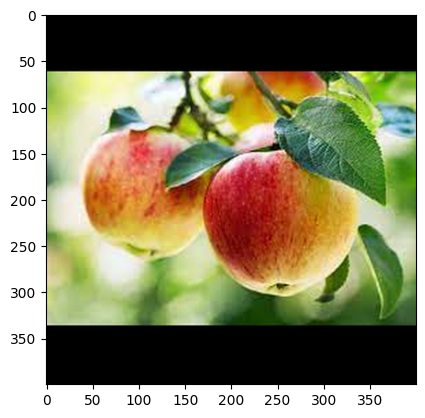

In [5]:
def expend2square(pil_img, background_color):
    width, height = pil_img.size
    print(width,height)

    # 정사각형 이미지인 경우
    if width == height:
        return pil_img
    
    # 너비가 높이보다 큰 경우
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)  # pil_img를 원하는 사이즈(width)로 생성하여 result에 저장
        result.paste(pil_img, (0, (width - height) // 2))
        return result
        """
        .paste() 메서드는 result 이미지 객체에 pil_img 이미지 객체를 (0,(width-height)//2) 위치에 붙여넣음
        따라서, pil_img 이미지는 result 이미지의 왼쪽 위 모서리에서부터 (0,(width-height)//2) 좌표로 이동하여 붙여짐
        """
    
    # 높이가 너비보다 큰 경우
    else:
        result = Image.new(pil_img.mode, (height, height), background_color) # pil_img를 원하는 사이즈(height)로 생성하여 result에 저장
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

def resize_with_padding(pil_img,new_size,background_color):
    img=expend2square(pil_img, background_color=None)
    img=img.resize((new_size[0],new_size[1]),Image.ANTIALIAS)
    
    return img

img = Image.open('./image_data/10_apple.png')

img_new=resize_with_padding(img,(400,400),(0,0,0))

plt.imshow(img_new)
plt.show()